In [9]:
import re
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

In [10]:
'''
Read fasta file
'''
#read fasta file
fasta = np.loadtxt("termite_g1.fasta",dtype="str")

#save the index of each scaffold: column[0]
scaffold_index_fasta = [i for i,item in enumerate(fasta) if ">" in item]
scaffold_index_fasta = np.vstack(scaffold_index_fasta)

#save the name of each scaffold: column[1]
scaffold_name_fasta = fasta[scaffold_index_fasta]
scaffold_name_fasta = np.char.replace(scaffold_name_fasta, ">", "")
scaffold_name_fasta = np.vstack(scaffold_name_fasta)

#save the starting position: column[2]
start_position_fasta = np.array(list((map(lambda x:x+1, scaffold_index_fasta))))
start_position_fasta = np.vstack(start_position_fasta)

#save the ending position: column[3]
end_position_fasta = np.array(list((map(lambda x:x-1, scaffold_index_fasta))))
end_position_fasta = np.append(end_position_fasta, [len(fasta)-1])
end_position_fasta = end_position_fasta[1:]
end_position_fasta = np.vstack(end_position_fasta)

#save the number of base in the last row: colunm[4]
ending_raw_fasta = []
for i in end_position_fasta:
    ending_raw_fasta.append(len(fasta[i][0]))
ending_raw_fasta = np.array(ending_raw_fasta)
ending_raw_fasta = np.vstack(ending_raw_fasta)

#how many bases in one raw: not show
base_one_raw_fasta = len(fasta[(scaffold_index_fasta[0]+1)][0])

#save the number of base in one scaffold: column[5]
total_base_fasta = (end_position_fasta - start_position_fasta)*base_one_raw_fasta + ending_raw_fasta
total_base_fasta = np.vstack(total_base_fasta)

#combine together
fasta_matrix = np.concatenate((scaffold_index_fasta, 
                           scaffold_name_fasta, 
                           start_position_fasta, 
                           end_position_fasta, 
                           ending_raw_fasta, 
                           total_base_fasta), axis = 1)
fasta_df = pd.DataFrame(fasta_matrix, columns = ["scaffold_index_fasta", 
                                                 "scaffold_name_fasta", 
                                                 "start_position_fasta", 
                                                 "end_position_fasta", 
                                                 "ending_raw_fasta", 
                                                 "total_base_fasta"]) 
fasta_df["scaffold_index_fasta"] = fasta_df["scaffold_index_fasta"].astype('int64')
fasta_df["start_position_fasta"] = fasta_df["start_position_fasta"].astype('int64')
fasta_df["end_position_fasta"] = fasta_df["end_position_fasta"].astype('int64')
fasta_df["ending_raw_fasta"] = fasta_df["ending_raw_fasta"].astype('int64')
fasta_df["total_base_fasta"] = fasta_df["total_base_fasta"].astype('int64')

In [11]:
####################################### FOR PREPROCESSING ###########################################
# Recheck the validity of fasta
summary_N = 0
summary_A = 0
summary_T = 0
summary_C= 0
summary_G = 0
for i in fasta[77245:115502]:
    for base in i:
        if base == "N":
            summary_N += 1
            continue
        if base == "A":
            summary_A += 1
            continue
        if base == "T":
            summary_T += 1
            continue
        if base == "C":
            summary_C += 1
            continue
        if base == "G":
            summary_G += 1
            continue
        else:
            print(base)
print("summary_A: ",summary_A)
print("summary_T: ",summary_T)
print("summary_C: ",summary_C)
print("summary_G: ",summary_G)
print("summary_N: ",summary_N)
print("total: ",(summary_A+summary_T+summary_C+summary_G+summary_N))

summary_A:  1166189
summary_T:  1127112
summary_C:  778572
summary_G:  743655
summary_N:  10095
total:  3825623


AttributeError: module 'matplotlib' has no attribute 'ylabel'

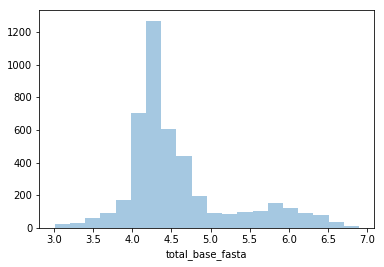

In [12]:
####################################### FOR PREPROCESSING ###########################################
# To check the distribution of length of genome
sns.distplot(np.log10(fasta_df["total_base_fasta"]), bins=20, kde=False)
plt.ylabel("Count")
plt.xlabel("Length of one scaffold (10^x)")
plt.title("Distribution of length of genome")
plt.show()

In [13]:
####################################### FOR PREPROCESSING ###########################################
fasta_df[fasta_df["total_base_fasta"] <= 100000].head()

,scaffold_index_fasta,scaffold_name_fasta,start_position_fasta,end_position_fasta,ending_raw_fasta,total_base_fasta
786,8614270,scaffold825|size99767,8614271,8615268,67,99767
787,8615269,scaffold827|size99345,8615270,8616263,45,99345
788,8616264,scaffold828|size99263,8616265,8617257,64,99264
791,8619960,scaffold831|size97970,8619961,8620940,70,97970
792,8620941,scaffold832|size97822,8620942,8621920,22,97822


In [14]:
'''
Read sam file
'''
# Read sam file
sam=[]
with open("isoseq_ccs_polished_hq_fasta_with_index_of_termite_g1_2018_9_7_ching_tien_wang.sam", "r") as f:
    for line in f.readlines():
        sam.append(line.split("\t"))
sam = np.array(sam)

In [15]:
####################################### FOR PREPROCESSING ###########################################
# MAKE A DISTRIBUTION OF MAPPING QUALITY
plt.figure(figsize=(20,5))
x = np.unique(mapping_q_dist, return_counts=True)[0]
y = np.unique(mapping_q_dist, return_counts=True)[1]
sns.barplot(x,np.log10(y),color="bule")
plt.ylabel("Count (10^x)")
plt.xlabel("Mapping quality")
plt.title("Distribution of mapping quality")
plt.show()

TypeError: 'module' object is not callable

In [16]:
####################################### FOR PREPROCESSING ###########################################
# MAKE A DISTRIBUTION OF LENGTH OF SCAFFOLD AND ITS LENGTH OF READS
read_number_dist = []
scaffold_length_dist = []
for k, j in zip(fasta_df["total_base_fasta"], fasta_df["scaffold_name_fasta"]):
    scaffold_name = j
    # Find index of selected scaffold in bam
    scaffold_in_sam = list([i for i,item in enumerate(sam) if scaffold_name in item])

    # Make a DataFrame for selected scaffold information
    ### Mide different sam type待解決
    selected_scaffold_df = [sam[i] for i in scaffold_in_sam]
    selected_scaffold_df = pd.DataFrame(selected_scaffold_df)
    read_number_dist.append(selected_scaffold_df.shape[0])
    scaffold_length_dist.append(k)

In [ ]:
####################################### FOR PREPROCESSING ###########################################
# MAKE A DISTRIBUTION OF LENGTH OF SCAFFOLD AND ITS LENGTH OF READS
read_number_dist_delete_500 = []
for i in read_number_dist:
    if i >= 500:
        read_number_dist_delete_500.append(0)
    else:
        read_number_dist_delete_500.append(i)
sns.set()
sns.scatterplot(np.log10(scaffold_length_dist),read_number_dist_delete_500)
plt.ylabel("Count")
plt.xlabel("Length of one scaffold (10^x)")
plt.title("Distribution of number of reads by length of scaffold")
plt.show()

In [ ]:
####################################### FOR PREPROCESSING ###########################################
sns.distplot(to_use_selected_scaffold_df["read length"], bins=60, kde=False)
plt.ylabel("Count")
plt.xlabel("Length of reads")
plt.title("Distribution of length of reads of scaffold825|size99767")
plt.show()

In [ ]:
####################################### FOR PREPROCESSING ###########################################
sns.distplot(to_use_selected_scaffold_df["mapping quality"], bins=50, kde=False)
plt.ylabel("Count")
plt.xlabel("Mapping quality")
plt.title("Distribution of mapping quality of scaffold800|size117680")
plt.show()